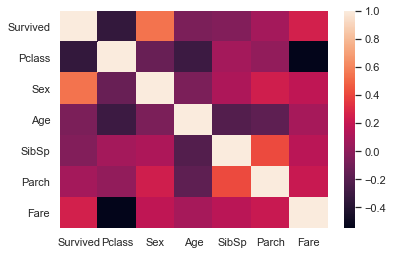

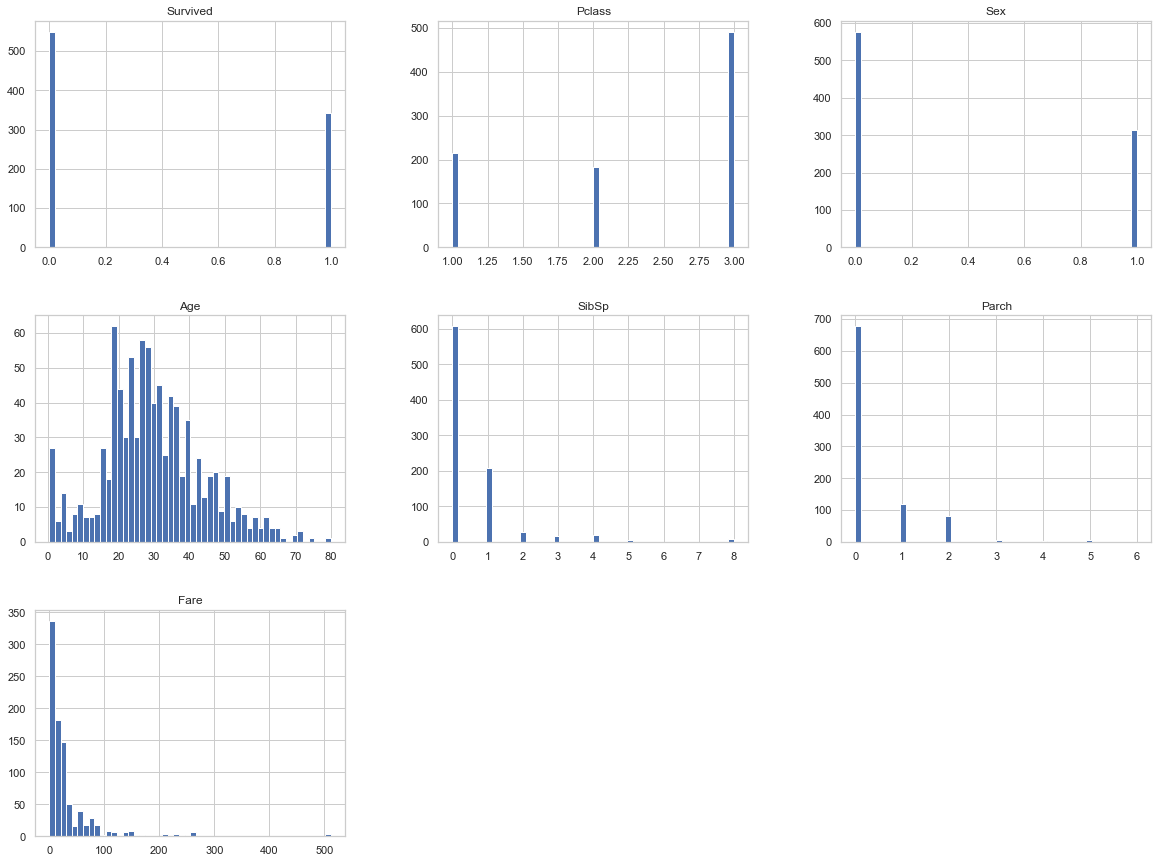

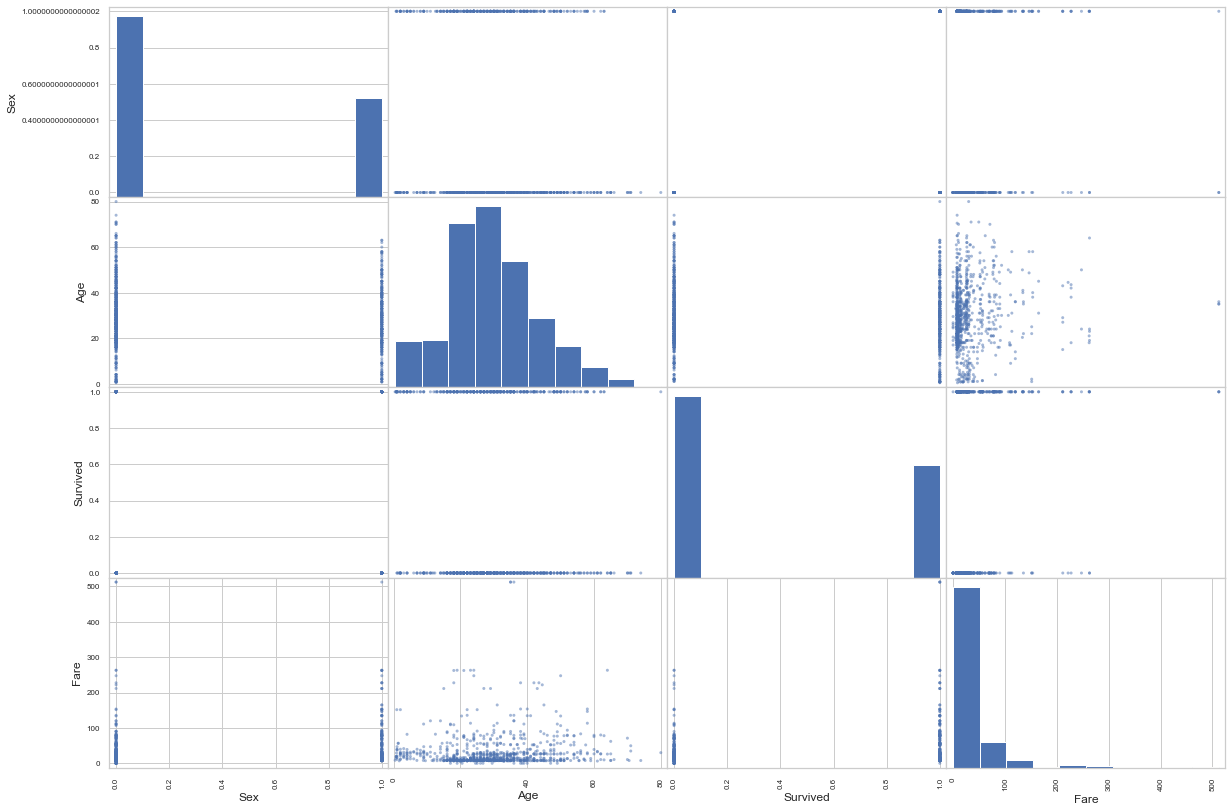

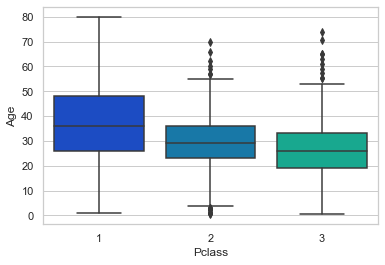

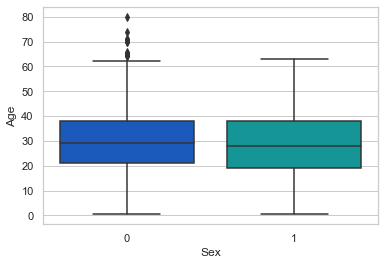

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='Fare'>

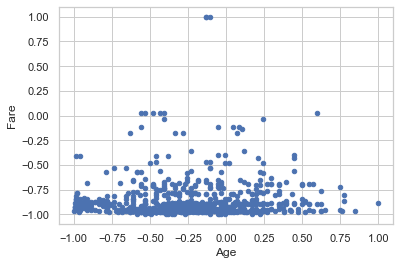

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler

"""
Passo-a-passo mínimo recomendado:
1. Carregue, explore e visualize os dados através de gráficos (...)
2. Remova as colunas que não agregam valor e justifique (X)
3. Trate valores nulos por coluna ou remova as linhas com dados nulos (X)
Ex.: Valores nulos da coluna 'Age', baseado em 'Pclass' e 'Sex'
4. Remova linhas que ainda contenham valores nulos (X)
5. Substitua colunas literais por valores numéricos (X)
6. Remova as colunas literais restantes (X)
7. Normalize os valores numéricos que não são binários 
"""

# Definition
df = pd.read_csv('train.csv')

# LINTING 1: Remove unecessary columns
df.drop('Name', 1, inplace=True)
df.drop('Ticket', 1, inplace=True)
df.drop('PassengerId', 1, inplace=True)
df.drop('Cabin', 1, inplace=True)
df.drop('Embarked', 1, inplace=True)

# LINTING 2: Literals to numeric
sex_map = {
    'male': 0,
    'female': 1,
}

df['Sex'].replace(sex_map, inplace=True)
for col in df.columns:
    col = pd.to_numeric(df[col], downcast='float', errors='coerce')

# LINTING 3: Remove rows with null (nan) values via interpolation
df['Age'].interpolate(inplace=True)

# Heatmap
sns.heatmap(df.corr(), fmt=".2f")
plt.show()

# PARSING

# 1: Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

# 2: Dispersion and correlation
attributes = ["Sex", "Age", "Survived", "Fare"]
scatter_matrix(df[attributes], figsize=(20, 14))
plt.show()

# 3: Boxplot
sns.set(style="whitegrid")
box_plot_1 = sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.show()
box_plot_2 = sns.boxplot(x='Sex', y='Age', data=df, palette='winter')
plt.show()

# 4: Normalization
scaler = MinMaxScaler((-1, 1))
scaled_df = df[['Fare', 'Age']].copy()
scaled_df[["Fare", "Age"]] = scaler.fit_transform(scaled_df[["Fare", "Age"]])
scaled_df.plot(kind="scatter", x="Age", y="Fare")